In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

# 데이터 관찰

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
import pandas as pd

iris_pd = pd.DataFrame(iris.data, columns = iris["feature_names"])
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris_pd["species"] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

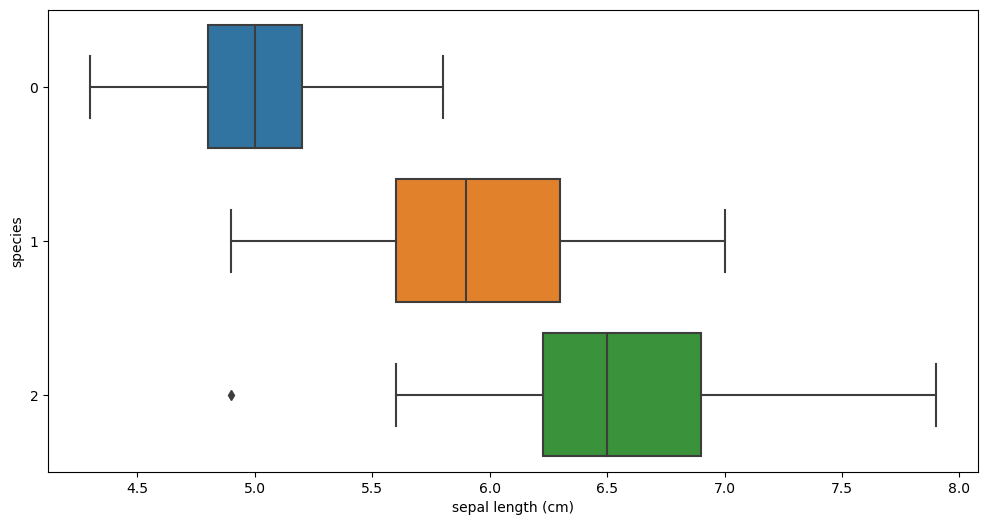

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data = iris_pd, x = 'sepal length (cm)', y ='species', orient='h');

<Figure size 1200x600 with 0 Axes>

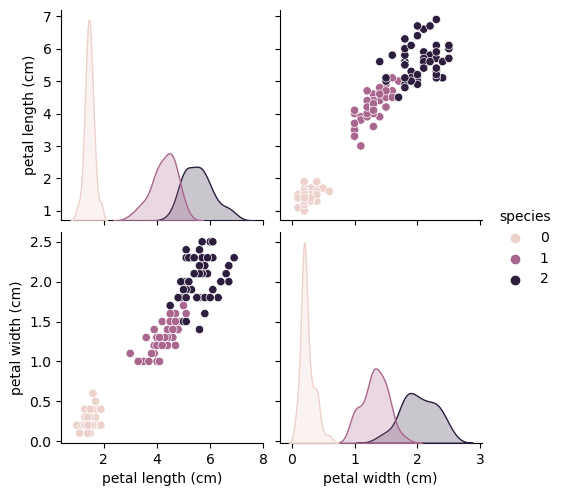

In [20]:
plt.figure(figsize=(12,6))
sns.pairplot(data= iris_pd,
             vars=["petal length (cm)","petal width (cm)"],
              hue="species");

알고리즘은 현재 상황에서 이것이 최선이라는 근거,</br>
혹은 이런 방향, 저런 방향으로 진행했을 때의 각각의 차이점에 대한 정량적 수치 제시

# Decision Tree

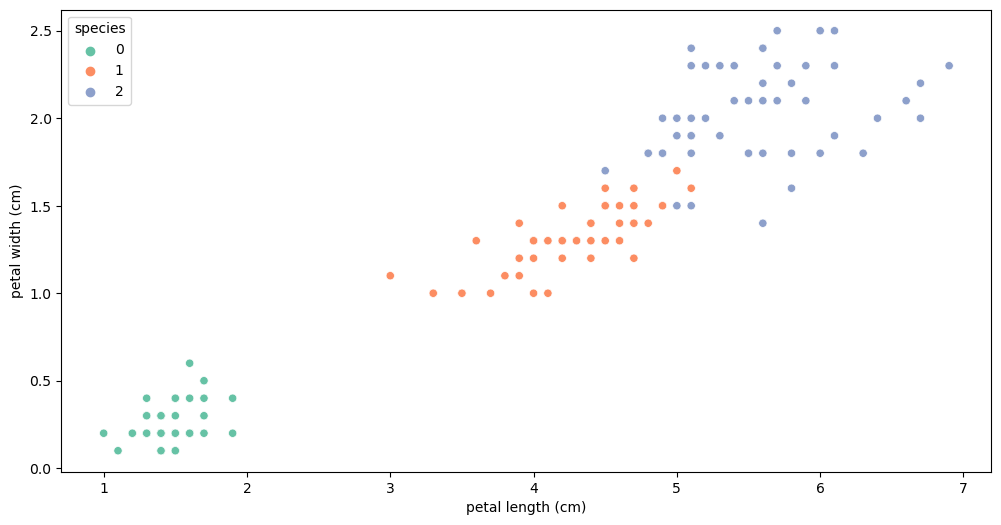

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(data= iris_pd,
                x="petal length (cm)", y = "petal width (cm)",
                hue="species", palette="Set2");

### 학습을 위해 두개의 데이터에 집중

In [24]:
iris_12 = iris_pd[iris_pd["species"]!=0]
iris_12.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


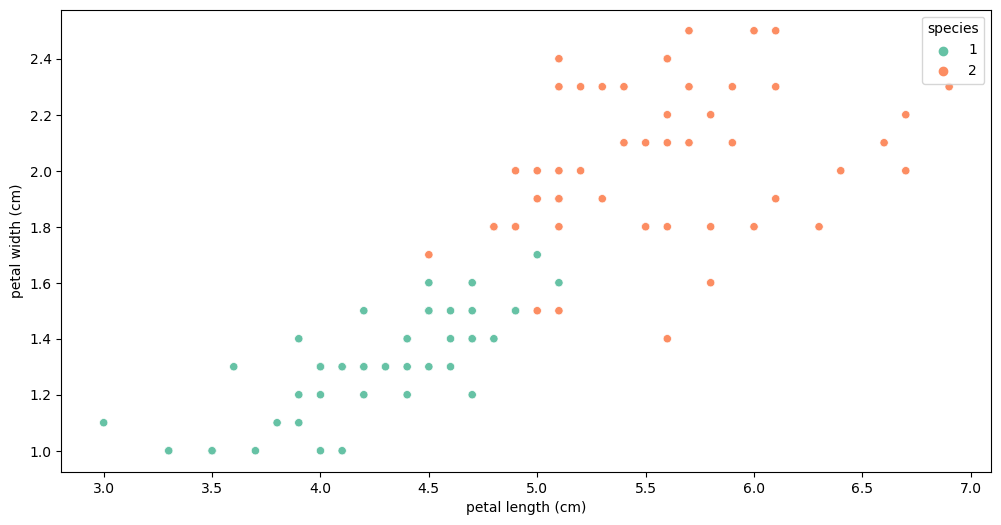

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(data= iris_12,
                x="petal length (cm)", y = "petal width (cm)",
                hue="species", palette="Set2");

Decision Tree의 분할기준(Split Criterion)
- 정보획득(imformation Gain)
    - 정보의 가치를 반환하는데 발생하는 사전의 확률이 작을 수록 정보의 가치는 커진다.
    - 정보 이득이란 어떤 속성을 선택함으로 인해서 데이터를 더 잘 구분하게 되는 것

- 엔트로피 개념
    - 열역학의 용어로 물질의 열적 상태를 나타내는 물리 량의 단위중 하나, 무질서의 정도를 나타냄
    - 확률 분포의 무질서나 불확실성 혹은 부담 정도를 나타내는 정보 엔트로피 개념을 클로드 섀넌이 고안
    

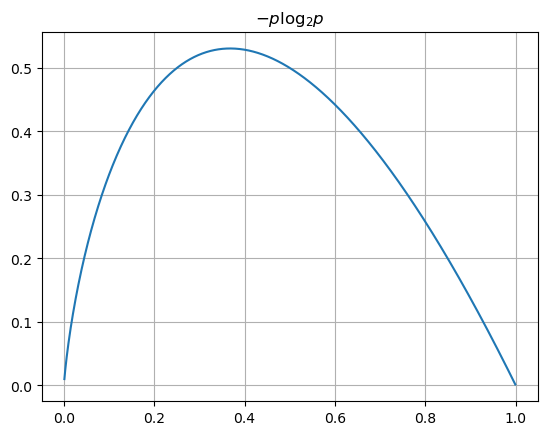

In [26]:
import numpy as np

p = np.arange(0.001, 1, 0.001)
plt.grid()
plt.title('$-p \log_{2}{p}$')
plt.plot(p, -p*np.log2(p));

- p는 해당 데이터가 해당 클래스에 속할 확률
- 어떤 확률 분포로 일어나는 사건을 표현하는 데 필요한 정보의 양이며</br>
    이값이 커질 수록 확률 분포의 불확실성이 커지며 결과에 대한 예측이 어려워짐

### 지니계수
- Gini index 혹은 불순도율
- 엔트로피의 계산량이 많아서 비슷한 개념이면서 계산량이 적은 지니계수를 사용하는 경우가 많음
- 1 - p^2


# Scikit Learn

- 2007년 구글 썸머 코드에서 처음 구현
- 현재 파이썬에서 가장 유명한 기계 학습 오픈 소스 라이브러리

In [27]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier()


In [28]:
iris_tree.fit(iris.data[:, 2:], iris.target)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(iris.data[:, 2:])
y_pred_tr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
accuracy_score(iris.target, y_pred_tr)

0.9933333333333333

# 과적합(Overfitting)

- 지도학습: 학습 대상이 되는 데이터에 정답(label)을 붙여서 학습시키고 모델을 얻어서 새로운 데이터에 사용하는 것
- 

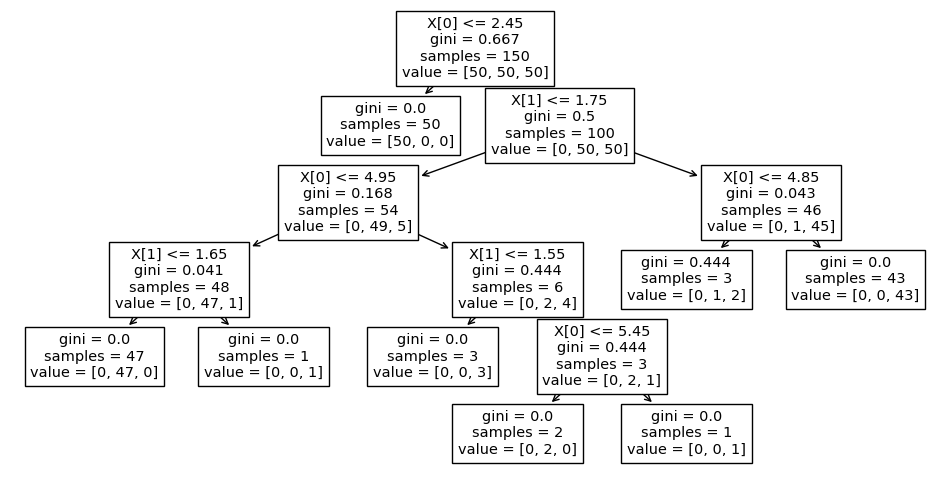

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,6))
plot_tree(iris_tree);

In [34]:
# !pip install mlxtend

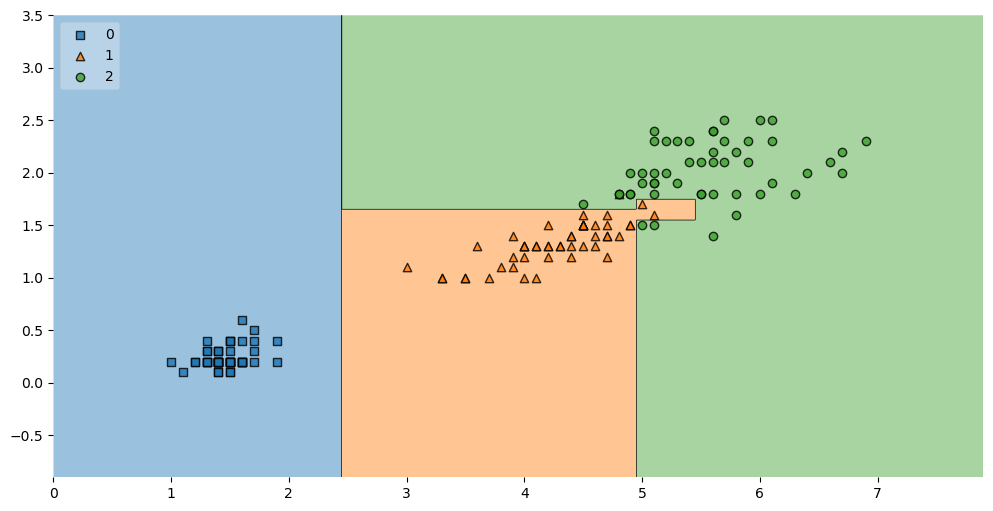

In [38]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12,6))
plot_decision_regions(X= iris.data[:, 2:], y = iris.target, clf= iris_tree, legend=2)
plt.show()

Accuracy가 높다고 믿을 수 있을 것인가?</br>
복잡한 경계면은 모델의 성능을 결국 나쁘게 만든다.


## 데이터 분리

- 훈련/ 검증/ 평가
- 확보한 데이터 중에서 모델 학습에 사용하지 않고 빼둔 데이터를 가지고 모델을 테스트한다.

In [39]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target


In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=13)

In [43]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [44]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13], dtype=int64))

In [47]:
# 타겟의 비율을 맞추고 싶을 때
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                    stratify=labels, random_state=13)

In [48]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10], dtype=int64))

In [49]:
iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13) # max_depth 규제를 통해 성능 제한
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

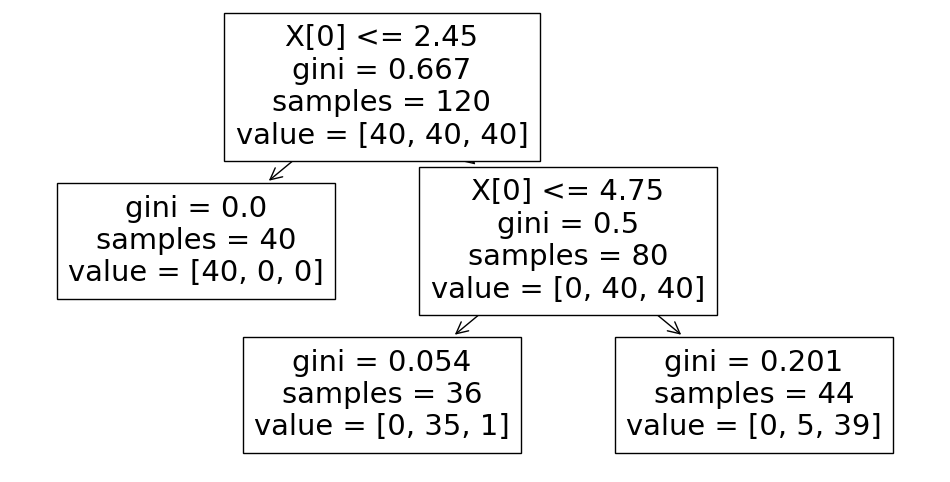

In [50]:
plt.figure(figsize=(12,6))
plot_tree(iris_tree);

In [56]:
# 저번보다 떨어진 정확도
y_pred_train = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_train)


0.95

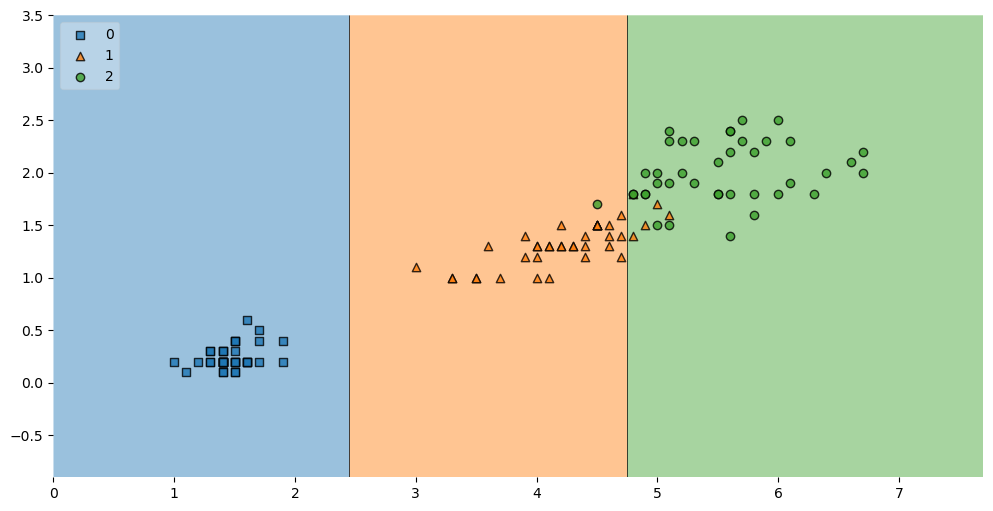

In [54]:
plt.figure(figsize=(12,6))
plot_decision_regions(X= X_train, y = y_train, clf= iris_tree, legend=2)
plt.show()

#### 테스트 데이터로 검증

In [58]:
# train과 test의 정확도가 비슷하면 과적합을 피했을 가능성이 있다.
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

<AxesSubplot:>

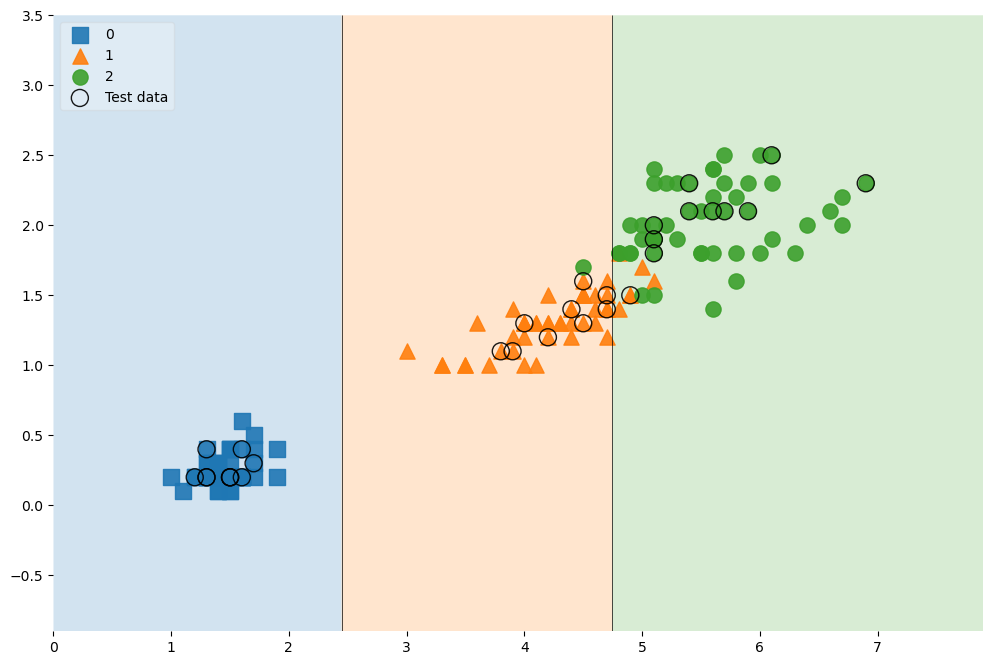

In [59]:
scatter_highlight_kwargs = {'s': 150, 'label': 'Test data', 'alpha':0.9}
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha':0.9}

plt.figure(figsize=(12,8))
plot_decision_regions(X= features, y= labels, 
                      X_highlight=X_test, clf= iris_tree, legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs={'alpha':0.2}
                      )


### 모든 컬럼 사용하기

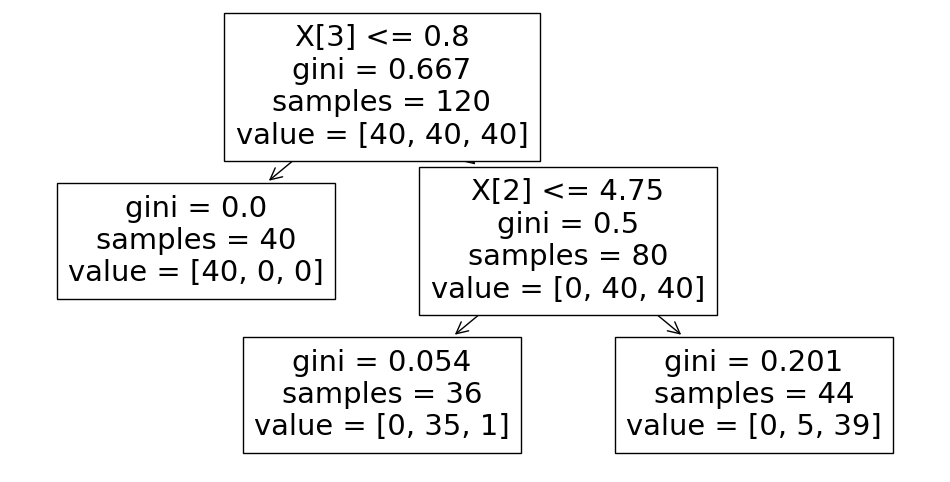

In [60]:
features = iris.data
labels = iris.target
# 타겟의 비율을 맞추고 싶을 때
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2,
                                                    stratify=labels, random_state=13)

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13) # max_depth 규제를 통해 성능 제한
iris_tree.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_tree(iris_tree);

In [61]:
y_pred_train = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_train)


0.95

In [63]:
test_data = np.array([[4.3,2.0,1.2,1]])
iris_tree.predict(test_data)

array([1])

In [64]:
test_data.shape

(1, 4)

In [65]:
iris_tree.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778]])

In [66]:
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

### 주요 특성 확인하기

In [67]:
iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [69]:
dict(zip(iris.feature_names, iris_tree.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.421897810218978,
 'petal width (cm)': 0.578102189781022}

#### 간단한 zip과 언패킹

In [70]:
list1 = ['a','b','c']
list2 = [1, 2, 3]

In [71]:
pairs = [pair for pair in zip(list1,list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [72]:
dict(pairs)

{'a': 1, 'b': 2, 'c': 3}

In [73]:
dict(zip(list1, list2))

{'a': 1, 'b': 2, 'c': 3}

In [74]:
x, y = zip(*pairs)
x, y

(('a', 'b', 'c'), (1, 2, 3))

In [75]:
list(y)

[1, 2, 3]